# Installing Dependencies

In [1]:
!pip install pandas matplotlib networkx seaborn

# Filtering Data

Only looking for data regarding the Brasileirao Serie A 2023 season

In [2]:
import pandas as pd

df_all = pd.read_csv('../campeonato-brasileiro-full.csv')

df_2023 = df_all[df_all["data"].str.contains("2023")]

df_2023

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
8025,8026,1,15/04/2023,16:01,Palmeiras,Cuiaba,4-2-3-1,4-2-3-1,A. Moreira Ferreira,I. Abreu Vieira,Palmeiras,Allianz Parque,2,1,SP,MT
8026,8027,1,15/04/2023,16:02,America-MG,Fluminense,4-2-3-1,4-2-2-2,V. Carmo Mancini,F. Diniz Silva,Fluminense,Estádio Raimundo Sampaio,0,3,MG,RJ
8027,8029,1,15/04/2023,18:31,Bragantino,Bahia,4-2-3-1,3-4-3,P. Faria Caixinha,R. Alves Paiva,Bragantino,Nabizão,2,1,SP,BA
8028,8030,1,15/04/2023,18:31,Athletico-PR,Goias,4-2-3-1,4-2-3-1,P. Turra,E. Rodrigues de Ávila,Athletico-PR,Ligga Arena,2,0,PR,GO
8029,8031,1,15/04/2023,18:32,Fortaleza,Internacional,4-2-2-2,4-2-3-1,J. Vojvoda,L. Venker de Menezes,-,Arena Castelão,1,1,CE,RS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8400,8401,38,06/12/2023,21:32,Bahia,Atletico-MG,3-4-2-1,4-4-2,R. Ceni,L. Scolari,Bahia,Itaipava Arena Fonte Nova,4,1,BA,MG
8401,8402,38,06/12/2023,21:32,Cuiaba,Athletico-PR,5-3-2,3-4-3,A. Cardoso de Oliveira,W. Carvalho,Cuiaba,Arena Pantanal,3,0,MT,PR
8402,8403,38,06/12/2023,21:32,Santos,Fortaleza,3-4-1-2,4-2-3-1,M. Fernandes,J. Vojvoda,Fortaleza,Estádio Urbano Caldeira,1,2,SP,CE
8403,8404,38,06/12/2023,21:32,Sao Paulo,Flamengo,4-2-3-1,4-2-3-1,D. Silvestre Júnior,A. Bacchi,Sao Paulo,Morumbi,1,0,SP,RJ


In [3]:
import numpy as np
from collections import defaultdict
    
team_dict = defaultdict(lambda:0)

for i in range(len(df_2023)):

    if df_2023.iloc[i]["visitante"] == df_2023.iloc[i]["vencedor"] or df_2023.iloc[i]["mandante"] == df_2023.iloc[i]["vencedor"]:
        team_dict[df_2023.iloc[i]["vencedor"]] += 3
    else:
        team_dict[df_2023.iloc[i]["visitante"]] += 1
        team_dict[df_2023.iloc[i]["mandante"]] += 1
    
sorted_teams = sorted(team_dict, key=lambda k: team_dict[k], reverse=True)

print(sorted_teams)

['Palmeiras', 'Gremio', 'Flamengo', 'Atletico-MG', 'Botafogo-RJ', 'Bragantino', 'Fluminense', 'Athletico-PR', 'Internacional', 'Fortaleza', 'Sao Paulo', 'Cuiaba', 'Corinthians', 'Cruzeiro', 'Vasco', 'Bahia', 'Santos', 'Goias', 'Coritiba', 'America-MG']


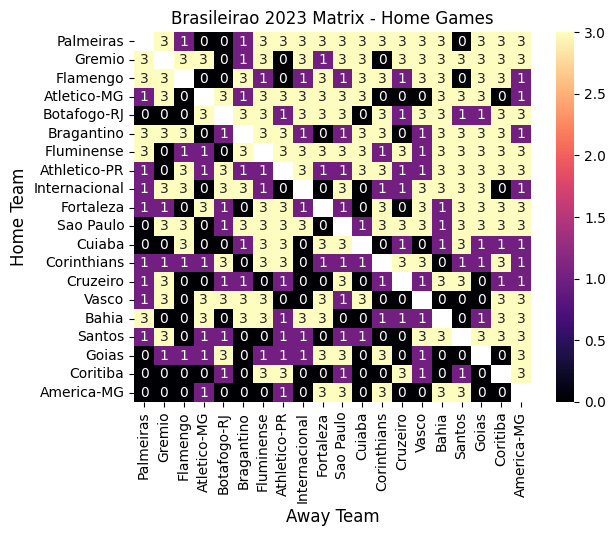

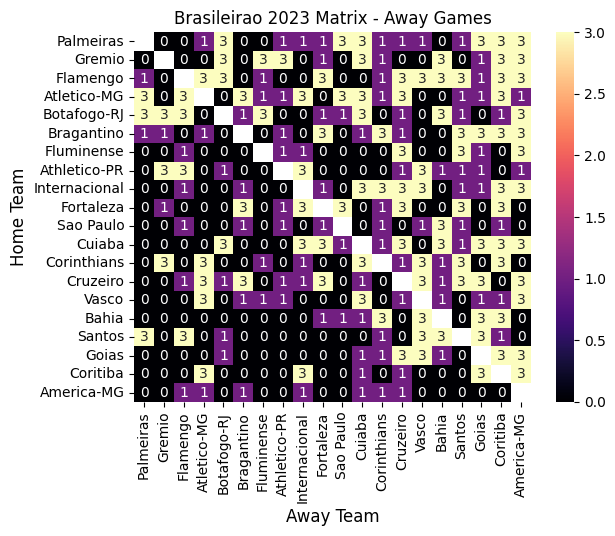

In [6]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

matrix_home = np.zeros((len(sorted_teams),len(sorted_teams)))
matrix_vis = np.zeros((len(sorted_teams),len(sorted_teams)))

for i in range(len(df_2023)):
    
    vis_i = sorted_teams.index(df_2023.iloc[i]["visitante"])
    home_i = sorted_teams.index(df_2023.iloc[i]["mandante"])

    if df_2023.iloc[i]["visitante"] == df_2023.iloc[i]["vencedor"]:
        matrix_home[home_i,vis_i] -= 0
        matrix_vis[vis_i,home_i] += 3
    elif df_2023.iloc[i]["mandante"] == df_2023.iloc[i]["vencedor"]:
        matrix_home[home_i,vis_i] += 3
        matrix_vis[vis_i,home_i] -= 0
    else:
        matrix_home[home_i,vis_i] += 1
        matrix_vis[vis_i,home_i] += 1
        
        
for t in sorted_teams:
    i = sorted_teams.index(t)
    matrix_home[i,i] = None
    matrix_vis[i,i] = None
        
        
df = DataFrame(matrix_home, index=sorted_teams, columns=sorted_teams)

sns.heatmap(df, annot=True, cmap="magma")

plt.xlabel("Away Team", fontsize=12)
plt.ylabel("Home Team", fontsize=12)
plt.title("Brasileirao 2023 Matrix - Home Games")
plt.show()

df = DataFrame(matrix_vis, index=sorted_teams, columns=sorted_teams)

sns.heatmap(df, annot=True, cmap="magma")

plt.xlabel("Away Team", fontsize=12)
plt.ylabel("Home Team", fontsize=12)
plt.title("Brasileirao 2023 Matrix - Away Games")
plt.show()

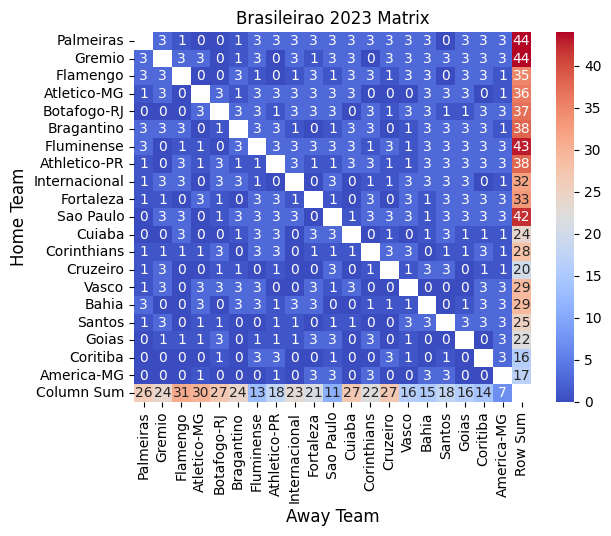

In [7]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

%matplotlib inline

teams = deepcopy(sorted_teams)

matrix = np.zeros((len(teams)+1,len(teams)+1))

for i in range(len(df_2023)):
    
    vis_i = teams.index(df_2023.iloc[i]["visitante"])
    home_i = teams.index(df_2023.iloc[i]["mandante"])

    if df_2023.iloc[i]["visitante"] == df_2023.iloc[i]["vencedor"]:
        matrix[home_i,vis_i] -= 0
        matrix[-1,vis_i] += 3
    elif df_2023.iloc[i]["mandante"] == df_2023.iloc[i]["vencedor"]:
        matrix[home_i,vis_i] += 3
        matrix[home_i,-1] += 3
    else:
        matrix[home_i,vis_i] += 1
        matrix[home_i,-1] += 1
        matrix[-1,vis_i] += 1


for i in range(len(teams)+1):
    matrix[i,i] = None

    
df = DataFrame(matrix, index=teams+["Column Sum"], columns=teams+["Row Sum"])

sns.heatmap(df, annot=True, cmap="coolwarm")

plt.xlabel("Away Team", fontsize=12)
plt.ylabel("Home Team", fontsize=12)
plt.title("Brasileirao 2023 Matrix")
plt.show()

## Getting the First Round

The championship is split into two "turnos", as we call it. Each one of them contains 19 games, onde for every team against eachother, be it at home or away. Teams who have faced eachoter in the first round will face eachother again in the second round, but with home-field advantage swapped.

In [3]:
df_2023_1o = df_2023[df_2023["rodata"] < 20]

df_2023_1o

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
8025,8026,1,15/04/2023,16:01,Palmeiras,Cuiaba,4-2-3-1,4-2-3-1,A. Moreira Ferreira,I. Abreu Vieira,Palmeiras,Allianz Parque,2,1,SP,MT
8026,8027,1,15/04/2023,16:02,America-MG,Fluminense,4-2-3-1,4-2-2-2,V. Carmo Mancini,F. Diniz Silva,Fluminense,Estádio Raimundo Sampaio,0,3,MG,RJ
8027,8029,1,15/04/2023,18:31,Bragantino,Bahia,4-2-3-1,3-4-3,P. Faria Caixinha,R. Alves Paiva,Bragantino,Nabizão,2,1,SP,BA
8028,8030,1,15/04/2023,18:31,Athletico-PR,Goias,4-2-3-1,4-2-3-1,P. Turra,E. Rodrigues de Ávila,Athletico-PR,Ligga Arena,2,0,PR,GO
8029,8031,1,15/04/2023,18:32,Fortaleza,Internacional,4-2-2-2,4-2-3-1,J. Vojvoda,L. Venker de Menezes,-,Arena Castelão,1,1,CE,RS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8210,8213,19,14/08/2023,19:01,Palmeiras,Cruzeiro,4-2-3-1,4-2-3-1,A. Moreira Ferreira,P. Marques da Costa Filipe,Palmeiras,Allianz Parque,1,0,SP,MG
8211,8214,19,14/08/2023,21:00,Bragantino,Vasco,4-3-3,4-1-4-1,P. Faria Caixinha,R. Díaz,-,Nabizão,1,1,SP,RJ
8212,8215,19,15/08/2023,20:00,Athletico-PR,Cuiaba,4-2-3-1,4-3-3,W. Carvalho,A. Cardoso de Oliveira,Athletico-PR,Ligga Arena,2,0,PR,MT
8252,8174,15,18/09/2023,21:01,Corinthians,Gremio,4-1-4-1,4-4-2,V. Luxemburgo da Silva,Renato Gaúcho,-,Neo Química Arena,4,4,SP,RS


In [14]:
from collections import defaultdict

win_dict_vis = defaultdict(lambda : defaultdict(int))

win_dict_man = defaultdict(lambda : defaultdict(int))


for i in range(len(df_2023_1o)):

    if df_2023_1o.iloc[i]["visitante"] == df_2023_1o.iloc[i]["vencedor"]:
        win_dict_vis[df_2023_1o.iloc[i]["vencedor"]][df_2023_1o.iloc[i]["mandante"]] += 3
    elif df_2023_1o.iloc[i]["mandante"] == df_2023_1o.iloc[i]["vencedor"]:
        win_dict_man[df_2023_1o.iloc[i]["vencedor"]][df_2023_1o.iloc[i]["visitante"]] += 3


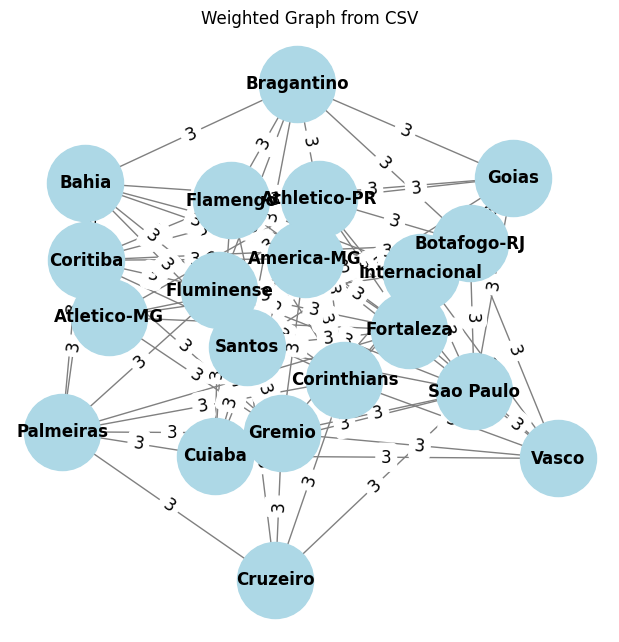

In [15]:
f = open("mandante.csv", "w")
f.write("from_node,to_node,weight\n")
for winner in win_dict_man:
    if winner != '-':
        for opp in win_dict_man[winner]:
            if opp != winner:
                if win_dict_man[winner][opp] > win_dict_man[opp][winner]:
                    f.write(",".join([winner,opp,str(win_dict_man[winner][opp])]))
                else:
                    f.write(",".join([opp,winner,str(win_dict_man[opp][winner])]))
                f.write("\n")
f.close()


import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("mandante.csv")

G = nx.Graph()

for _, row in df.iterrows():
    G.add_edge(row["from_node"], row["to_node"], weight=row["weight"])

edge_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}

pos = nx.spring_layout(G)

plt.figure(figsize=(6, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=12, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
plt.title("Weighted Graph from CSV")
plt.show()


In [16]:
f = open("visitante.csv", "w")
f.write("from_node,to_node,weight\n")
for winner in win_dict_vis:
    if winner != '-':
        for opp in win_dict_vis[winner]:
            if opp != winner:
                if win_dict_vis[winner][opp] > win_dict_vis[opp][winner]:
                    f.write(",".join([winner,opp,str(win_dict_vis[winner][opp])]))
                else:
                    f.write(",".join([opp,winner,str(win_dict_vis[opp][winner])]))
                f.write("\n")
f.close()



import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("visitante.csv")

G = nx.Graph()

for _, row in df.iterrows():
    G.add_edge(row["from_node"], row["to_node"], weight=row["weight"])

edge_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}

pos = nx.spring_layout(G)

plt.figure(figsize=(6, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=12, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
plt.title("Weighted Graph from CSV")
plt.show()


RuntimeError: dictionary changed size during iteration